In [49]:
import sys
import os
sys.path.insert(0, '../../')
import plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

analyzer = plots.DataAnalyser()

len reasonable 51


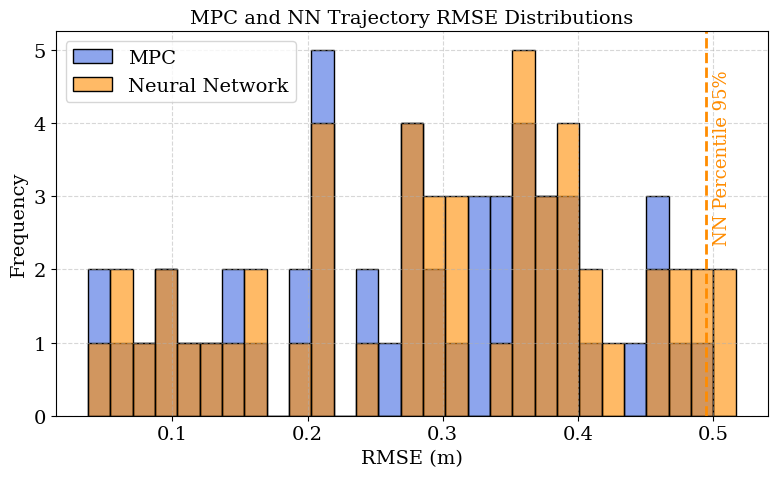

In [50]:
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 14})
path = 'dataset_metadata copy.csv'
df_total = pd.read_csv(path, sep=',')

# Filters - reasonable trajectories
df_reasonable = df_total[(df_total['mpc_success'] == True) & (df_total['mpc_RMSe'] <= 0.5 ) & (df_total['nn_success'] == True)]
print('len reasonable', len(df_reasonable))

analyzer.plot_histogram(df_reasonable, 'mpc_RMSe', 'nn_RMSe', 'RMSE (m)','MPC and NN Trajectory RMSE Distributions', ['MPC', 'Neural Network'], save_name='trajectory_rmse.pdf', percentile_2=0.95, stat='count', show_mean=False, num_bins = 30)
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', '$t_{execution}/t_{simulation}$', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='simulation_time (s)')


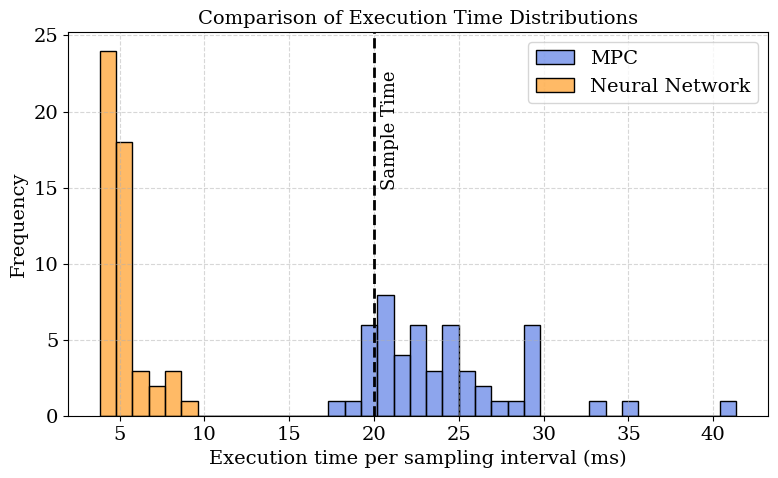

In [51]:
analyzer.plot_histogram(df_reasonable, 'mpc_execution_time (s)', 'nn_execution_time (s)', 'Execution time per sampling interval (ms)', 'Comparison of Execution Time Distributions', ['MPC', 'Neural Network'], normalization_column='num_iterations', save_name='exec_time_hist.pdf', gain=1000, stat='count', show_mean=False, num_bins=40)
#c.plot_histogram('training_results\Training dataset v0 - octorotor/', 'mpc_execution_time (s)', 'nn_execution_time', 'CPU Use Percentage', 'Comparison of CPU Use Percentage', ['MPC', 'Neural Network'], normalization_column=['time_sample (s)', 'num_iterations'])



In [52]:
stats_rmse = analyzer.stats_simulations(df_reasonable, 'mpc_RMSe', 'nn_RMSe')
stats_rmse

,Controller,min,max,mean,std
0,MPC,0.037637,0.484720,0.279378,0.122391
1,Neural Network,0.049646,0.516662,0.299638,0.133393


In [53]:
stats_execution_time = analyzer.stats_simulations(df_reasonable, 'mpc_execution_time_per_iteration', 'nn_execution_time_per_iteration')
stats_execution_time


,Controller,min,max,mean,std
0,MPC,0.017538,0.041351,0.024095,0.004564
1,Neural Network,0.003835,0.008716,0.005122,0.001151


C:\Users\mathe\AppData\Local\Temp\ipykernel_41156\991164806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_phi'] = np.max(np.abs(df_reasonable[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_41156\991164806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_phi'] = np.max(np.abs(df_reasonable[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)


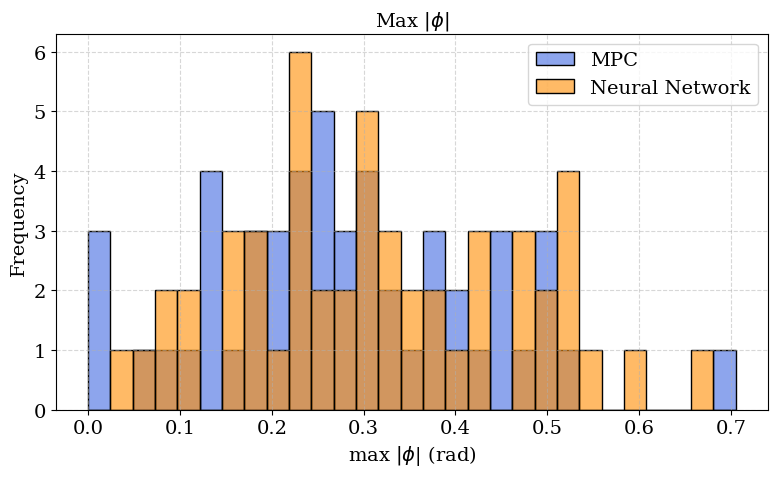

In [54]:
df_reasonable['nn_max_abs_phi'] = np.max(np.abs(df_reasonable[['nn_max_phi (rad)','nn_min_phi (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_phi'] = np.max(np.abs(df_reasonable[['mpc_max_phi (rad)','mpc_min_phi (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_phi', 'nn_max_abs_phi', 'max $|\\phi$| (rad)', 'Max $|\\phi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [55]:
stats_max_phi = analyzer.stats_simulations(df_reasonable, 'mpc_max_phi (rad)', 'nn_max_phi (rad)')
stats_max_phi

,Controller,min,max,mean,std
0,MPC,1.863060e-08,0.705262,0.225902,0.142607
1,Neural Network,4.554505e-02,0.679987,0.259943,0.147965


C:\Users\mathe\AppData\Local\Temp\ipykernel_41156\269989624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_theta'] = np.max(np.abs(df_reasonable[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_41156\269989624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_theta'] = np.max(np.abs(df_reasonable[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)


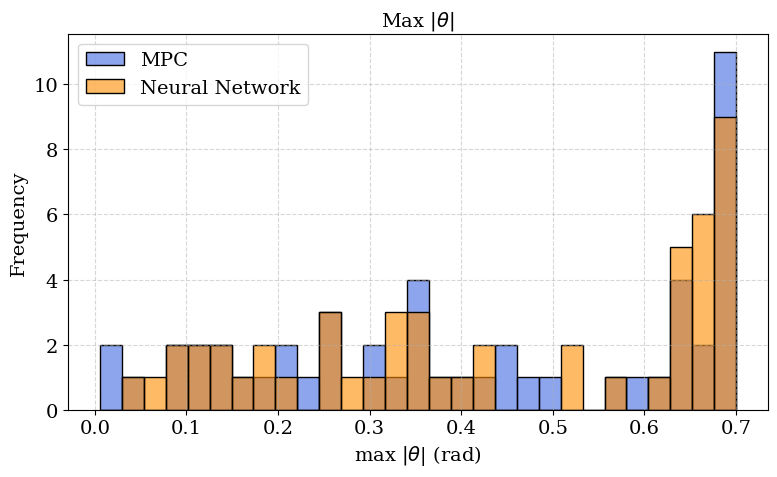

In [56]:
df_reasonable['nn_max_abs_theta'] = np.max(np.abs(df_reasonable[['nn_max_theta (rad)','nn_min_theta (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_theta'] = np.max(np.abs(df_reasonable[['mpc_max_theta (rad)','mpc_min_theta (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_theta', 'nn_max_abs_theta', 'max $|\\theta$| (rad)', 'Max $|\\theta|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

C:\Users\mathe\AppData\Local\Temp\ipykernel_41156\571555454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['nn_max_abs_psi'] = np.max(np.abs(df_reasonable[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
C:\Users\mathe\AppData\Local\Temp\ipykernel_41156\571555454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reasonable['mpc_max_abs_psi'] = np.max(np.abs(df_reasonable[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)


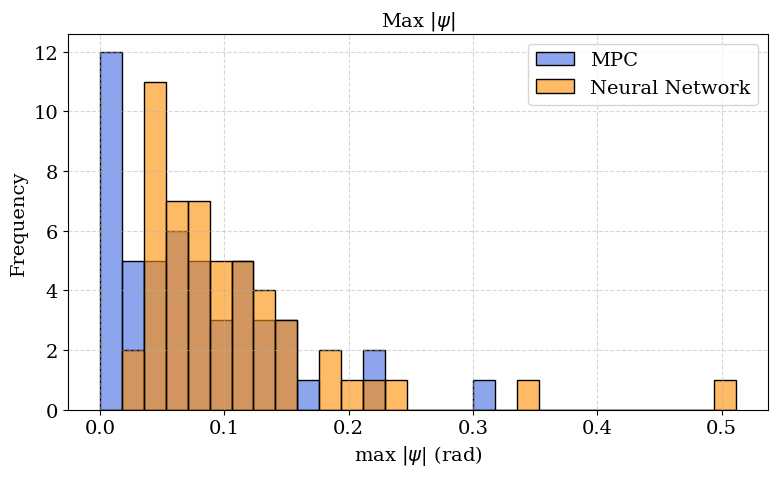

In [57]:
df_reasonable['nn_max_abs_psi'] = np.max(np.abs(df_reasonable[['nn_max_psi (rad)','nn_min_psi (rad)']]), axis = 1)
df_reasonable['mpc_max_abs_psi'] = np.max(np.abs(df_reasonable[['mpc_max_psi (rad)','mpc_min_psi (rad)']]), axis = 1)

analyzer.plot_histogram(df_reasonable, 'mpc_max_abs_psi', 'nn_max_abs_psi', 'max $|\\psi$| (rad)', 'Max $|\\psi|$', ['MPC', 'Neural Network'], stat='count', show_mean=False,num_bins=30)

In [58]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_phi']
# y2 = df_performance['mpc_max_phi (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\phi$ (rad)')
# plt.title('Max Phi vs Period')
# plt.legend(['Neural Network', 'MPC'])

In [59]:
# x = df_performance['period (s)']
# y1 = df_performance['nn_max_theta']
# y2 = df_performance['mpc_max_theta (rad)']

# fig = plt.figure()
# plt.plot(x,y1)
# plt.plot(x,y2)
# plt.xlabel('Period (s)')
# plt.ylabel('Max $\\theta$ (rad)')
# plt.title('Max Theta vs Period')
# plt.legend(['Neural Network', 'MPC'])

c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:536: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)
c:\Users\mathe\OneDrive\Documentos\Embraer\PEE 31\ITA\Fase IV - Mestrado\Drive - Mestrado NN aplicado a Controle\Codes\6dof_quadrotor\figures-tables\reasonable-trajectories\../..\plots.py:538: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


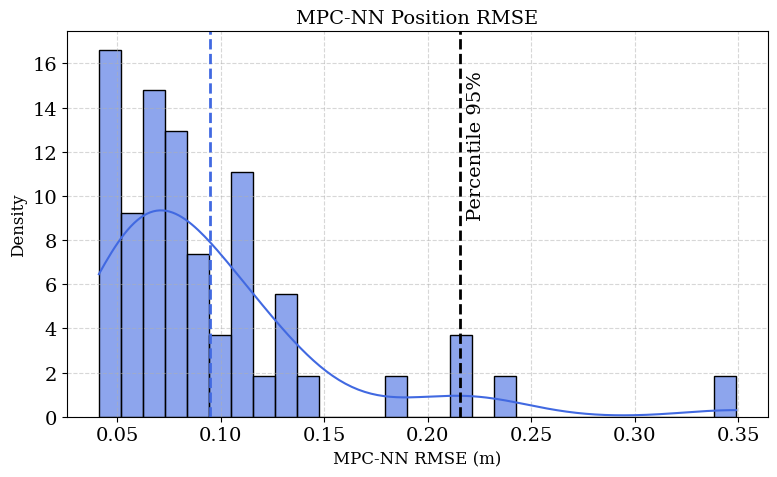

In [60]:
# MPC-NN Position RMSE
analyzer.plot_histogram_temp(df_reasonable, 'inter_position_RMSe', 'MPC-NN RMSE (m)', 'MPC-NN Position RMSE', percentile=0.95, save_name='inter-rmse.pdf')

C:\Users\mathe\AppData\Local\Temp\ipykernel_41156\1614591183.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])


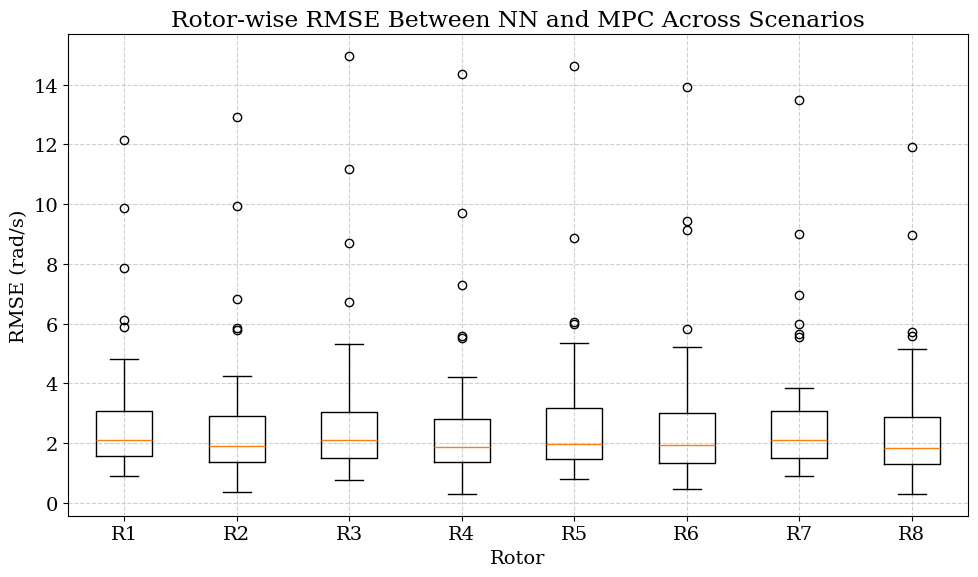

In [61]:
# Rotor-wise RMSE Between NN and MPC across scenarios
plt.figure(figsize=(10, 6))
plt.boxplot([df_reasonable[f'RMSe_u{i}'] for i in range(8)], labels=[f'R{i+1}' for i in range(8)])
plt.ylabel("RMSE (rad/s)")
plt.xlabel("Rotor")
plt.title("Rotor-wise RMSE Between NN and MPC Across Scenarios")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('plots/omega_boxplots.pdf')
plt.show()

In [62]:
df_reasonable[df_reasonable['RMSe_u0'] > 4][['mpc_RMSe', 'nn_RMSe']]

,mpc_RMSe,nn_RMSe
70,0.440967,0.516662
73,0.319212,0.353242
111,0.203797,0.279695
117,0.214389,0.355044
123,0.250166,0.288902
130,0.327255,0.457485
132,0.353991,0.507313


In [63]:
df_reasonable.groupby('trajectory_type').size()

trajectory_type
circle_xy       10
circle_xz        2
line            19
lissajous_xy    20
dtype: int64

In [64]:
#Next steps
# Include omega_max in dataset_metadata
# Describe reasonable trajectory in text
# Describe MPC parameters for the simulations
# OBS: SCRIPT DE SAIDA EM CASO DE DISTANCIAMENTO ESTA OCULTADO E PRECISAM SER HARMONIZADOS SE FOREM REATIVADOS!!!